Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
MSE: 10089009299.50155
R² Score: 0.9179971706985147
MAE: 80879.09722219854


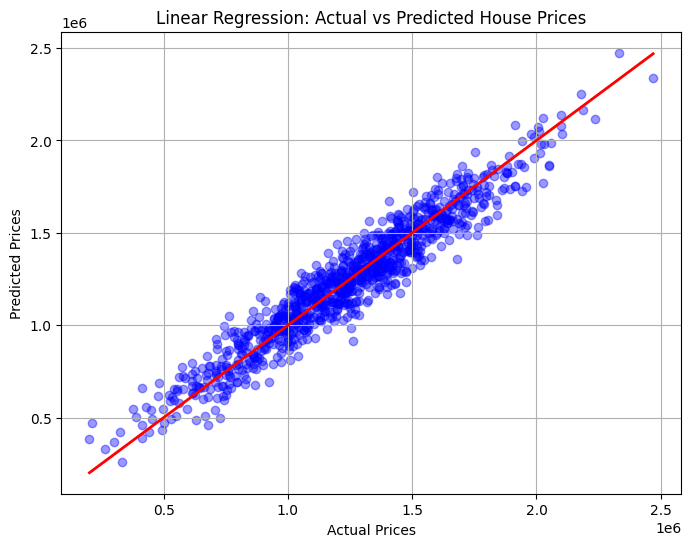

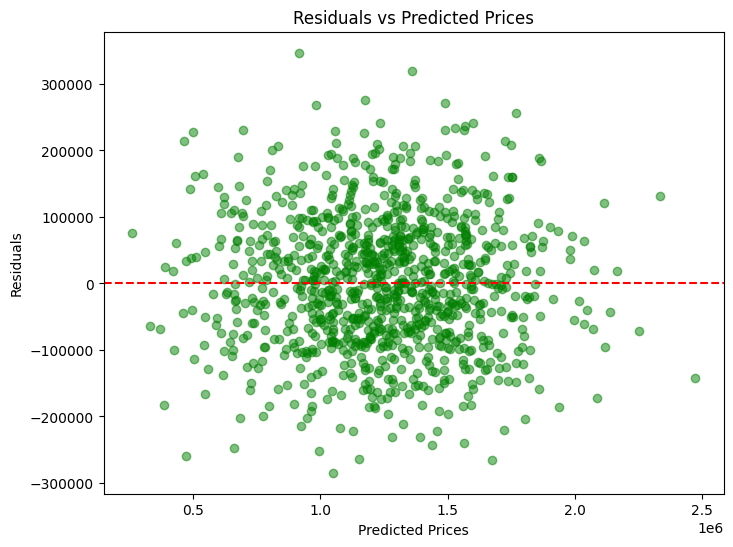

' Residual less than 0 (below the red line):\nActual < Predicted\n\nThe model overestimated the house price.\n\nExample: Model predicted ₹60L, actual was ₹50L → residual = -10L.\n\n🔼 Residual greater than 0 (above the red line):\nActual > Predicted\n\nThe model underestimated the house price.\n\nExample: Model predicted ₹40L, actual was ₹55L → residual = +15L.\n\n '

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
Data = pd.read_csv('housing.xls')

# Check missing values and handle them (if needed)
print(Data.isnull().sum())  # Check missing values
# Example: Dropping rows with missing values
Data = Data.dropna()

# Define features (X) and target (y)
X = Data[['Avg. Area Income', 'Avg. Area House Age', 
          'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
          'Area Population']]
y = Data['Price']

# Split data into training and test sets (use a smaller test size like 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale features (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (use scaled data if scaling)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict the house prices
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)
print("MAE:", mae)

# Plotting Actual vs Predicted
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.grid(True)
plt.savefig("LinearRegression.jpg")
plt.show()

# Plotting Residuals
# residual = actual - predicted
# residuals = y_test - y_pred
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
#  This line represents:
# The zero residual line, i.e., where actual value = predicted value.
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()
""" Residual less than 0 (below the red line):
Actual < Predicted

The model overestimated the house price.

Example: Model predicted ₹60L, actual was ₹50L → residual = -10L.

🔼 Residual greater than 0 (above the red line):
Actual > Predicted

The model underestimated the house price.

Example: Model predicted ₹40L, actual was ₹55L → residual = +15L.

 """

In [6]:
Data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
SampleUserInput=[[10002,2344,4,5,589]]
Predicted_Output=model.predict(SampleUserInput)
print(Predicted_Output)

[2.79270997e+09]


In [8]:
import pickle
# Save the trained Decision Tree model as 'decision_tree_model.pkl'
with open("project-root/model/Linear_Regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Decision Tree model saved as 'Linear_Regression_model.pkl'")


✅ Decision Tree model saved as 'Linear_Regression_model.pkl'
